In [11]:
library(zoo)
library(ggplot2)
library(dplyr)
library (lubridate)


Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date



download zoo, ggplot2, dplyr and lubridate library.

A. zoo library -->  zoo's key design goals are independence of a particular index/date/time class and consistency with ts and base R by providing methods to extend standard generics (as quoted from rdocumentation.org)


B. ggplot --> get into the world of programmatic data visualization. If DPLYR consists the library of a grammar of data manipulation, then ggplot2 will do the grammar of graphics. It has several function as follow:
1. aesthetics or data that will be plotted
2. geometris or the shape of the data (bar plot or scattered graphs, etc)
3. scales or transformation towards the data
4. facets or elements that may be graphed in the same dataset in the same space
5. layers or lay multiple geometris to reveal new information


C. dplyr --> a grammar of data manipulation, as quoted from Hadley Wickham. Dplyr has three main function, one of which is to identify the most important data manipulation verbs and make them easy to use from R. Command that can be found in dplyr: mutate (), select (), filter (), summarise () and arrange ().

D. lubridate --> R package that makes it easier to work with dates and times.  (as quoted from CRAN-R)

In [12]:
unltickets <- read.csv("Data/tickets.csv")
head(unltickets)

Citation,Date,Location,Violation
15078429,2012-04-02 07:15:00,North Stadium,Expired Meter
24048318,2012-04-02 07:22:00,Housing,No Valid Permit Displayed
24048320,2012-04-02 07:26:00,14th & W Street,No Valid Permit Displayed
15078430,2012-04-02 07:36:00,Champions Club,Parking in Unauthorized Area
18074937,2012-04-02 07:39:00,Sandoz,Expired Meter
18074938,2012-04-02 07:40:00,Sandoz,Expired Meter


import the data 

**UNIVERSITY OF NEBRASKA-LINCOLN (UNL) PARKING TICKETS BY MONTH**

In [13]:
unlticketsbymonth <- unltickets %>% mutate(
    shortdate = format(as.POSIXct(Date, format="%Y-%m-%d")),
    yearmonth = as.yearmon(shortdate)
) %>% group_by(yearmonth) %>% summarize(
    count = n()
)
head(unlticketsbymonth)

yearmonth,count
Apr 2012,3473
May 2012,2572
Jun 2012,2478
Jul 2012,2134
Aug 2012,3774
Sep 2012,4138


group by first by year and month. use command yearmonth = as.yearmon (shortdate)

In [14]:
sapply(unlticketsbymonth, class)

yearmonth     count 
"yearmon" "integer"

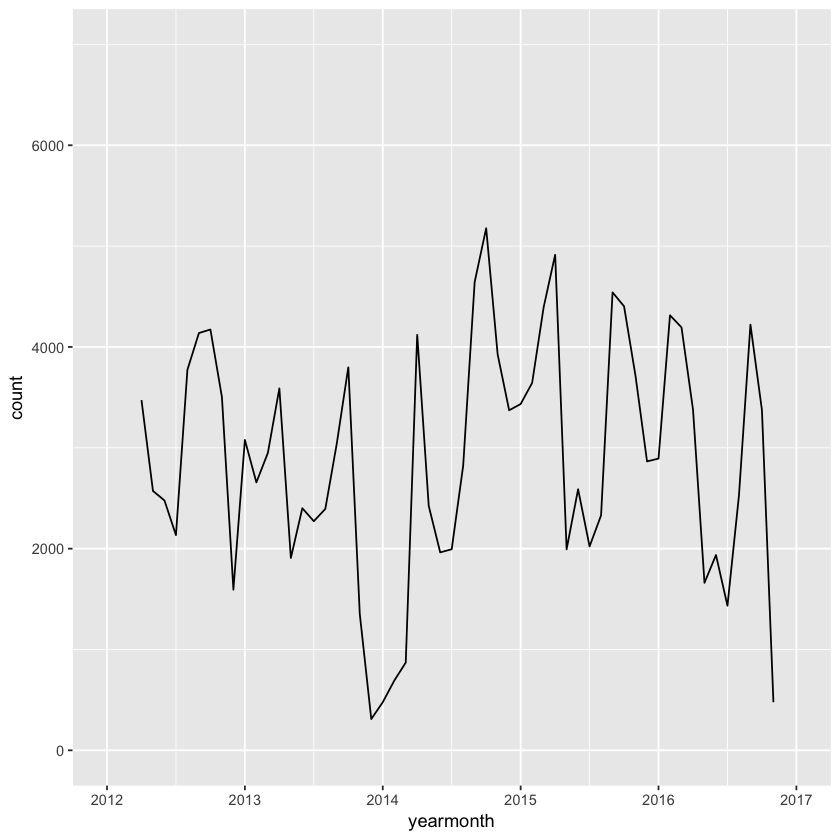

In [15]:
ggplot(unlticketsbymonth, aes(x=yearmonth, y=count)) + geom_line() + scale_y_continuous(limits = c(0, 7000)) + scale_x_continuous(limits = c(2012, 2017))

make the line plot and determine the min and max scale for x and y axises

ggplot(unlticketsbymonth, aes(x=yearmonth, y=count)) + geom_line() + scale_x_yearmon(format = "%b %y", n=9) + labs(x="Halfyear", y="Parking tickets", title="Parking tickets by month at UNL from 2012 to 2016", subtitle="Parking tickets at UNL drop significantly twice in 4 years.", caption="Graphic by Utami Diah Kusumawati")

labelling the line plot

**UNIVERSITY OF NEBRASKA-LINCOLN (UNL) PARKING TICKETS BY WEEK**

In [17]:
unlticketsbyweek <- unltickets %>% mutate(
    week = floor_date(ymd_hms(Date), "week")) %>%
    group_by(week) %>%
    summarise(
    count = n ()
    )

now, lets make it per week using command week=floor_date (ymd_hms (Date), "week") and group by as well as summarise it!

In [18]:
head (unlticketsbyweek)

week,count
2012-04-01,951
2012-04-08,729
2012-04-15,777
2012-04-22,885
2012-04-29,416
2012-05-06,407


In [19]:
sapply(unlticketsbyweek, class)

$week
[1] "POSIXct" "POSIXt" 

$count
[1] "integer"

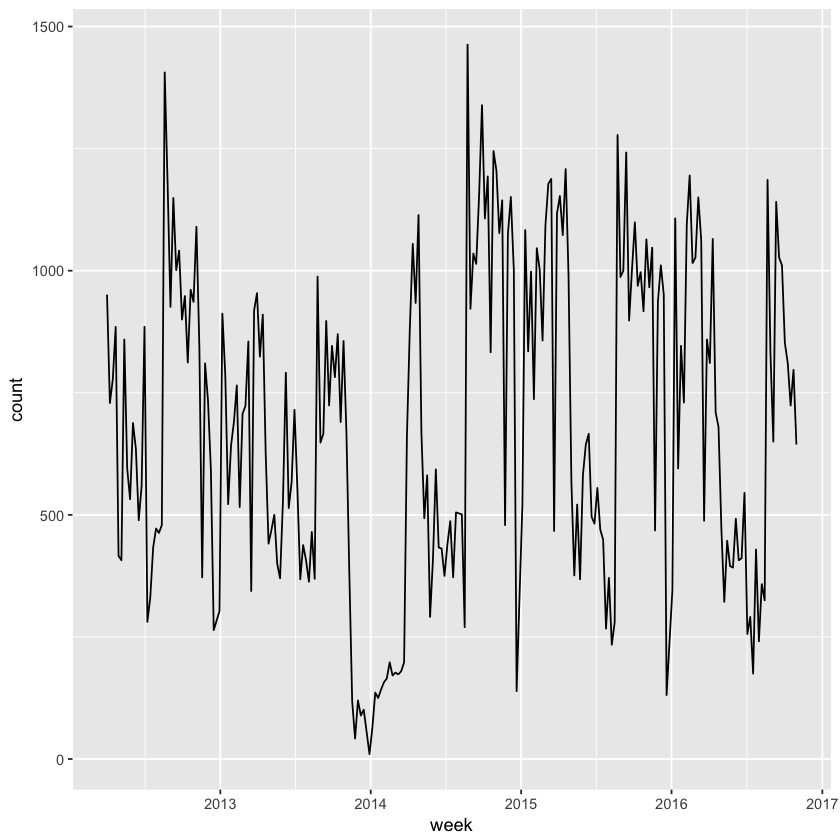

In [20]:
ggplot(unlticketsbyweek, aes(x=week, y=count)) + geom_line() 

use the base command for the line plot, we cannot use x_scale_continuous because the data is a week column.

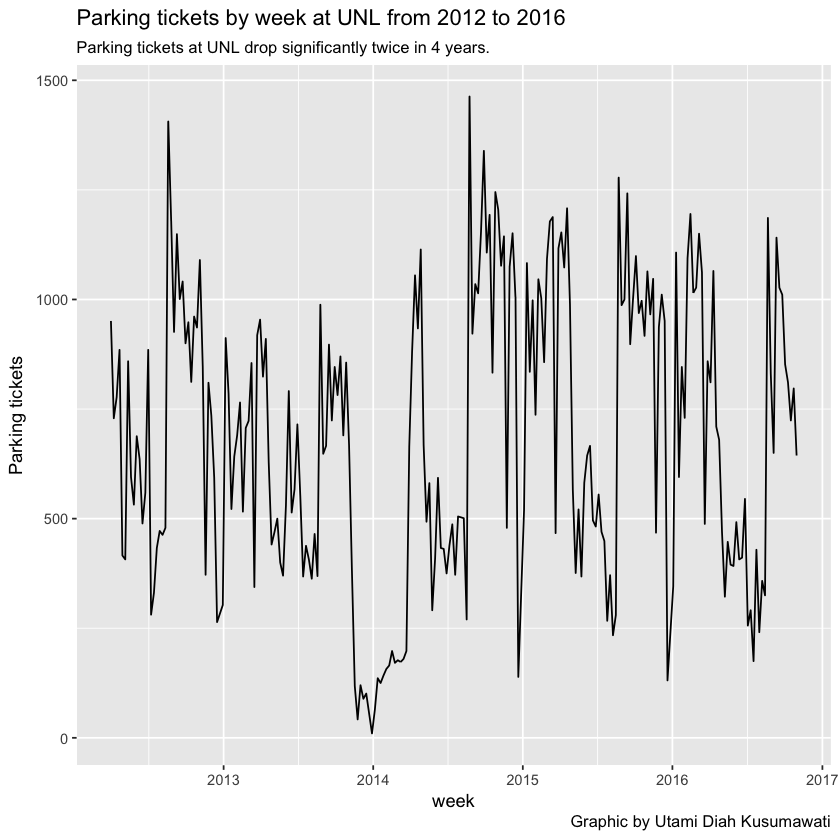

In [31]:
ggplot(unlticketsbyweek, aes(x=week, y=count)) + geom_line() + labs(x="week", y="Parking tickets", title="Parking tickets by week at UNL from 2012 to 2016", subtitle="Parking tickets at UNL drop significantly twice in 4 years.", caption="Graphic by Utami Diah Kusumawati")

labelling the week line plot 